# **Bootcamp Ciencia de Datos e Inteligencia Artificial**
# **Módulo 5. Deep Learning**
## **Semana 17. Fundamentos de redes neuronales**

¡Hola! Te damos la bienvenida a un módulo nuevo, en el que exploraremos el deep learning y las redes neuronales. Vamos a usar muchos de los conceptos que hemos aprendido hasta ahora y, por supuesto, aprenderemos nuevos temas, que aplicaremos en ejercicios y en el proyecto del módulo.

Revisa el contenido con especial atención, haz tu copia y comienza a practicar, pues de esa manera surgirán dudas que podrás resolver con tu coach el día de tu clase.

# Introducción a las redes neuronales

Aquí hay algo que podría sorprenderte: ¡las redes neuronales no son tan complicadas! El término *red neuronal* se ha puesto de moda, pero en realidad es mucho más simple de lo que te imaginas.

Una red neuronal es una serie de algoritmos que se esfuerzan por reconocer las relaciones subyacentes en un conjunto de datos, por medio de un proceso que imita la forma en que opera el cerebro humano. En este sentido, las redes neuronales se refieren a sistemas de neuronas, ya sean de naturaleza orgánica o artificial.

Las redes neuronales pueden adaptarse a los cambios de entrada, por lo que la red genera el mejor resultado posible sin necesidad de rediseñar los criterios de salida.

En las finanzas, las redes neuronales ayudan al desarrollo de procesos, como la previsión de series temporales, el comercio algorítmico, la clasificación de valores, la modelización del riesgo crediticio y la construcción de indicadores propios y derivados de precios.

Una red neuronal funciona de manera similar a la red neuronal del cerebro humano. Una neurona en una red neuronal es una función matemática que recopila y clasifica información de acuerdo con una arquitectura específica. La red tiene un gran parecido a los métodos estadísticos, como el ajuste de curvas y el análisis de regresión.

Vamos a comenzar entonces a pasar de la teoría a la práctica.




En primer lugar, tenemos que hablar de las neuronas, la unidad básica de una red neuronal. Una neurona toma entradas, hace algunos cálculos con ellas y produce una salida, tal como se ve en la figura 1.

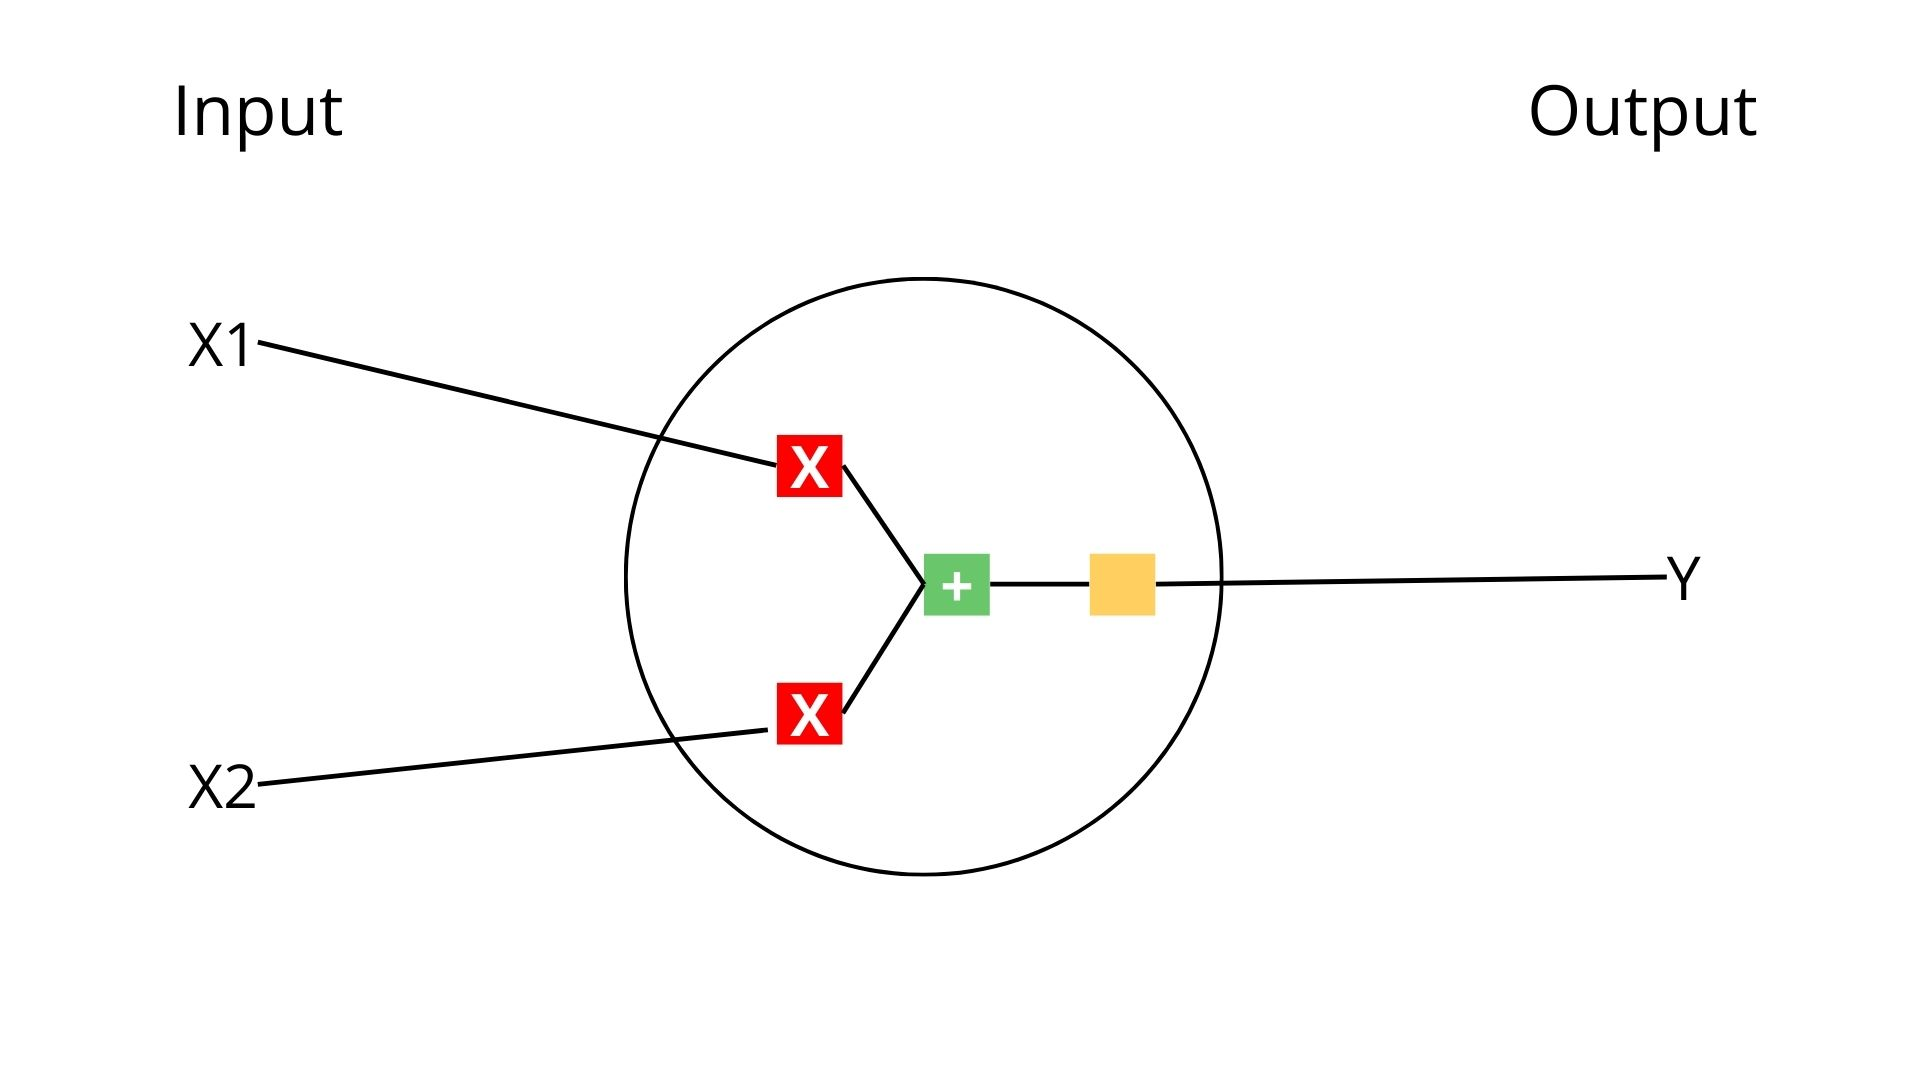

Tres cosas están sucediendo aquí. Primero, que cada entrada se multiplica por un peso $X$.
$$
X_{1} \rightarrow X_{1} * w_1
$$
$$
X_{2} \rightarrow X_{2} * w_2
$$

A continuación todas las entradas ponderadas se suman con un sesgo $b$.
$$
(X_{1} * w_1) + (X_{2} * w_2) + b
$$

Finalmente, la suma se pasa a través de una función de activación.
$$
\begin{equation}
f(x_{1} * w_1 + X_{2} + w_2 + b)=y
\end{equation}
$$

La función de activación se usa para convertir una entrada ilimitada en una salida que tiene una forma agradable y predecible. Una función de activación comúnmente utilizada es la función sigmoide:

![Representación de la funciíon Sigmoide](https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/600px-Funci%C3%B3n_sigmoide_01.svg.png)

La función sigmoide solo genera números en el rango $(0, 1)$. Puedes pensar en ello como comprimir $(-\infty, +\infty)$ a $( 0 ,1 )- $. Los números negativos grandes se convierten en $\sim0$, y los números positivos grandes se convierten en $\sim1$.

# Ejemplo

Supongamos que tenemos una neurona de dos entradas que usa la función de activación sigmoide y tiene los siguientes parámetros:
$$
w = [0,1]
$$
$$
b = 4
$$

$w=[ 0 ,1 ]$ es solo una forma de escribir $w_1 = 0$, $w_2 = 1$. Ahora démosle a la neurona una entrada de $X = [2, 3]$.
$$
(w \centerdot X) + b = ( (w_1 * X_{1}) + (w_2 * X_{2}) ) + b
$$
$$
=0∗2+1∗3+4
$$
$$
=7
$$
$$
\begin{equation}
f(w \centerdot x + b) = f(7) = 0.999
\end{equation}
$$

Las salidas de las neuronas $0.9990$, dadas las entradas $X = [2, 3]$. ¡Eso es todo! Este proceso de pasar entradas para obtener una salida se conoce como *feedforward* o redes profundas alimentadas hacia adelante, pero eso lo veremos a detalle en la siguiente semana.

Ahora que sabes cómo hacer una red neuronal simple con papel y matemáticas, es hora de hacerla con Python.

Para ello, nos apoyaremos en ``numpy``.

In [ ]:
import numpy as np

# definir una funcion
def sigmoide(x):
  # Definimos nuestra función de activación: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

# Creamos nuestra clase, que será nuestra red neuronal
class Neurona:
  def __init__(self, pesos, bias):
    self.pesos = pesos
    self.bias = bias

  def activacion(self, inputs):
    # Inputs de peso. Añadimos sesgo y usamos la función de activación
    total = np.dot(self.pesos, inputs) + self.bias
    return sigmoide(total)

pesos = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neurona(pesos, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.activacion(x))


¿Reconoces ese 0.99? Es el mismo al que llegamos en el ejemplo hecho a mano.

Pero ¿qué quiere decir ese 0.999? Si recordamos la base de este ejemplo de red neuronal, que es la función sigmoide que describe la evolución de sistemas complejos naturales, podemos definir que mientras mayor sea esta puntuación, en otras palabras, mientras más tienda a 1, mayor presición tendrá.

# Combinación de neuronas

Una red neuronal no es más que un conjunto de neuronas conectadas entre sí. Así es como se vería una red neuronal simple:

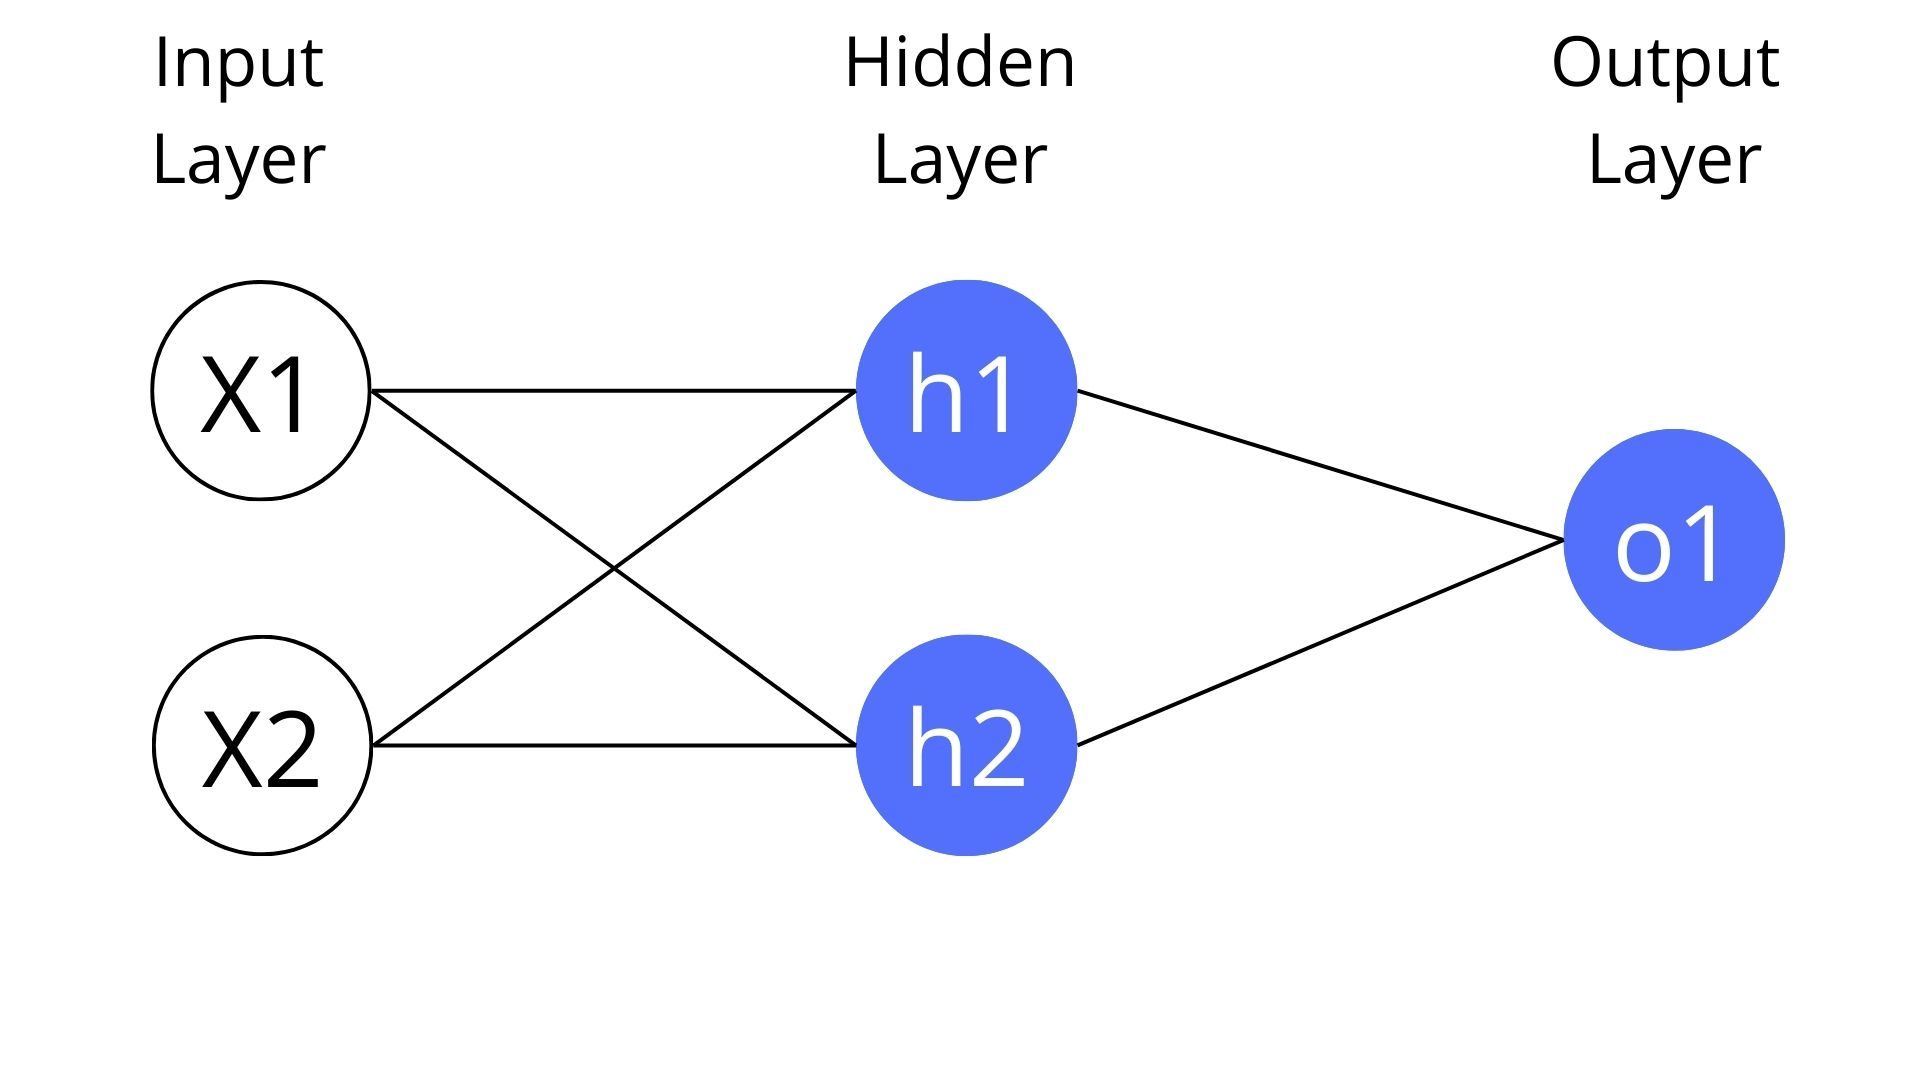

Esta red tiene dos entradas, una capa oculta con dos neuronas $(h_1$ y $h_2)$ y una capa de salida con una neurona $(o_1)$. Observa que para $o_1$ son las salidas de $h_1$ y $h_2$. Esto es lo que le da el término de **red**.

También puedes ver que $h_1$ y $h_2$ están en una **capa oculta**; esto es, cualquier capa entre la de entrada (input) y la de salida (output), y puede haber N cantidad de capas ocultas. De igual forma, esas capas puede tener cualquier cantidad de neuronas dentro de esas capas. La idea es alimentar las entradas por medio de las neuronas de la red, para obtener las salidas al final.

Ahora vamos a hacer nuestra red neuronal combinada en Python.

In [ ]:
import numpy as np

# Vamos a usar el código de la sección anterior, así que ejecútalo primero

class MiRedNeuronal:
  '''
  Una red neuronal con:
  - Dos inputs
  - Una capa oculta con dos neuronas (h1 y h2)
  - Una capa de salida con una neurona (o1)

  Cada neurona tiene los mismos pesos y sesgo:
  - w = [0, 1]
  - b = 0
  '''
  # Iniciamos nuestra clase
  def __init__(self):
    pesos = np.array([0, 1])
    bias = 0

    # Aquí usamos la clase "Neurona" de la sección anterior para generar nuestras capas y la salida
    self.h1 = Neurona(pesos, bias)
    self.h2 = Neurona(pesos, bias)
    self.o1 = Neurona(pesos, bias)

    # Alimentamos la red neuronal
  def alimentacion(self, x):
    out_h1 = self.h1.activacion(x)
    out_h2 = self.h2.activacion(x)

    # Las entradas para o1 son las salidas de h1 y h2
    out_o1 = self.o1.activacion(np.array([out_h1, out_h2]))

    return out_o1

network = MiRedNeuronal()
x = np.array([2, 3])
print(network.alimentacion(x))

# Ponte a prueba

Ahora vamos a poner a prueba tus conocimientos con este ejercicio.

Realiza una red neuronal con los siguientes requerimientos:
- Tres inputs de 10, 30 y 40.
- Un bias de 1.
- Dos capas ocultas.
- Analiza los resultados.


# Deep learning vs machine learning

Los módulos pasados viste machine learning supervizado y no supervizado. Ambos métodos tienen sus aplicaciones, así como sus pros y contras. Sin embargo, ninguno es deep learning o aprendizaje profundo.

El **aprendizaje automático** significa que las computadoras aprenden de los datos usando algoritmos, para realizar una tarea sin estar programados explícitamente. El **aprendizaje profundo** utiliza una estructura de algoritmos modelados en el cerebro humano, como se vio en el tema de la similitud de las neuronas. Esto permite el procesamiento de datos no estructurados, como documentos, imágenes y texto.

Sin embargo, debes considerar que el aprendizaje profundo o deep learning es un subcojunto o derivado del machine learning. Se le llama profundo por la estructura, en la que tienes múltiples capas de entrada, de salida y ocultas. Cada una de estas procesa la información de entrada, la cual sirve para alimentar la siguiente capa.

Hay más diferencias:

|  | Machine learning | Deep learning |
|---|---|---|
| **Número de puntos de datos**  |  Puede usar pequeñas cantidades de datos para hacer predicciones.	 | Necesita usar grandes cantidades de datos de entrenamiento para hacer predicciones. |
| **Dependencias de hardware** | Puede trabajar en máquinas de gama baja. No necesita una gran cantidad de potencia computacional. | Depende de máquinas de gama alta. Intrínsecamente, hace una gran cantidad de multiplicaciones de matrices. Una GPU puede optimizar de manera eficiente estas operaciones. |
| **Proceso de caracterización** | Requiere que los usuarios identifiquen y creen con precisión las características. | Aprende funciones a partir de datos y crea nuevas funciones por sí mismo. |
| **Enfoque de aprendizaje** | Divide el proceso de aprendizaje en pasos más pequeños. Luego, combina los resultados de cada paso en una sola salida. | Se mueve a través del proceso de aprendizaje, resolviendo el problema de principio a fin. |
| **Tiempo de ejecución** | Se necesita relativamente poco tiempo para entrenar, desde unos pocos segundos hasta unas pocas horas. | Por lo general, lleva mucho tiempo entrenarlo, porque un algoritmo de aprendizaje profundo involucra muchas capas. |
| **Producción** | El resultado suele ser un valor numérico, como una puntuación o una clasificación. | La salida puede tener múltiples formatos, como un texto, una partitura o un sonido. |

Claro, las diferencias dependerán también del tipo de red neuronal, del método de machine learning que sigamos y de los datos. Sin embargo, tú podrás sacar tus propias conclusiones cuando se revisen más formas de hacer redes neuronales.



# Red neuronal con un dataset

Para esto vamos a usar Keras, una biblioteca de Python potente y fácil de emplear para desarrollar y evaluar modelos de deep learning.

Forma parte de la  biblioteca TensorFlow y nos permite definir y entrenar modelos de redes neuronales con solo unas pocas líneas de código.

Utilizaremos la biblioteca NumPy para cargar su conjunto de datos y dos clases de la biblioteca Keras, para definir su modelo.

Primero, instalamos SciPy y TensorFlow en nuestro entorno.

In [ ]:
!pip install scipy
!pip install tensorflow

Después, importamos las bibliotecas necesarias.

In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Vamos a usar el dataset de diabetes que hemos usado anteriormente para entrenar nuestra red neuronal. Este lo puedes obtener en el siguiente enlace:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

Puedes ver más detalles del dataset en este enlace: https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

Como tal, es un problema de clasificación binaria (inicio de diabetes como 1 o no como 0). Todas las variables de entrada que describen a cada paciente son numéricas. Esto facilita su uso directo con redes neuronales que esperan valores numéricos de entrada y salida, y es una opción ideal para nuestra primera red neuronal en Keras.

En esta ocasión, lo cargaremos en Array, no en dataset, para facilitar el proceso de entrenamiento.


In [5]:
import pandas as pd
from numpy import loadtxt

# Cargar el dataset como matriz NumPy
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

# Convertir a DataFrame de pandas
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.DataFrame(dataset, columns=column_names)

# Mostrar las primeras filas
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2797567947.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


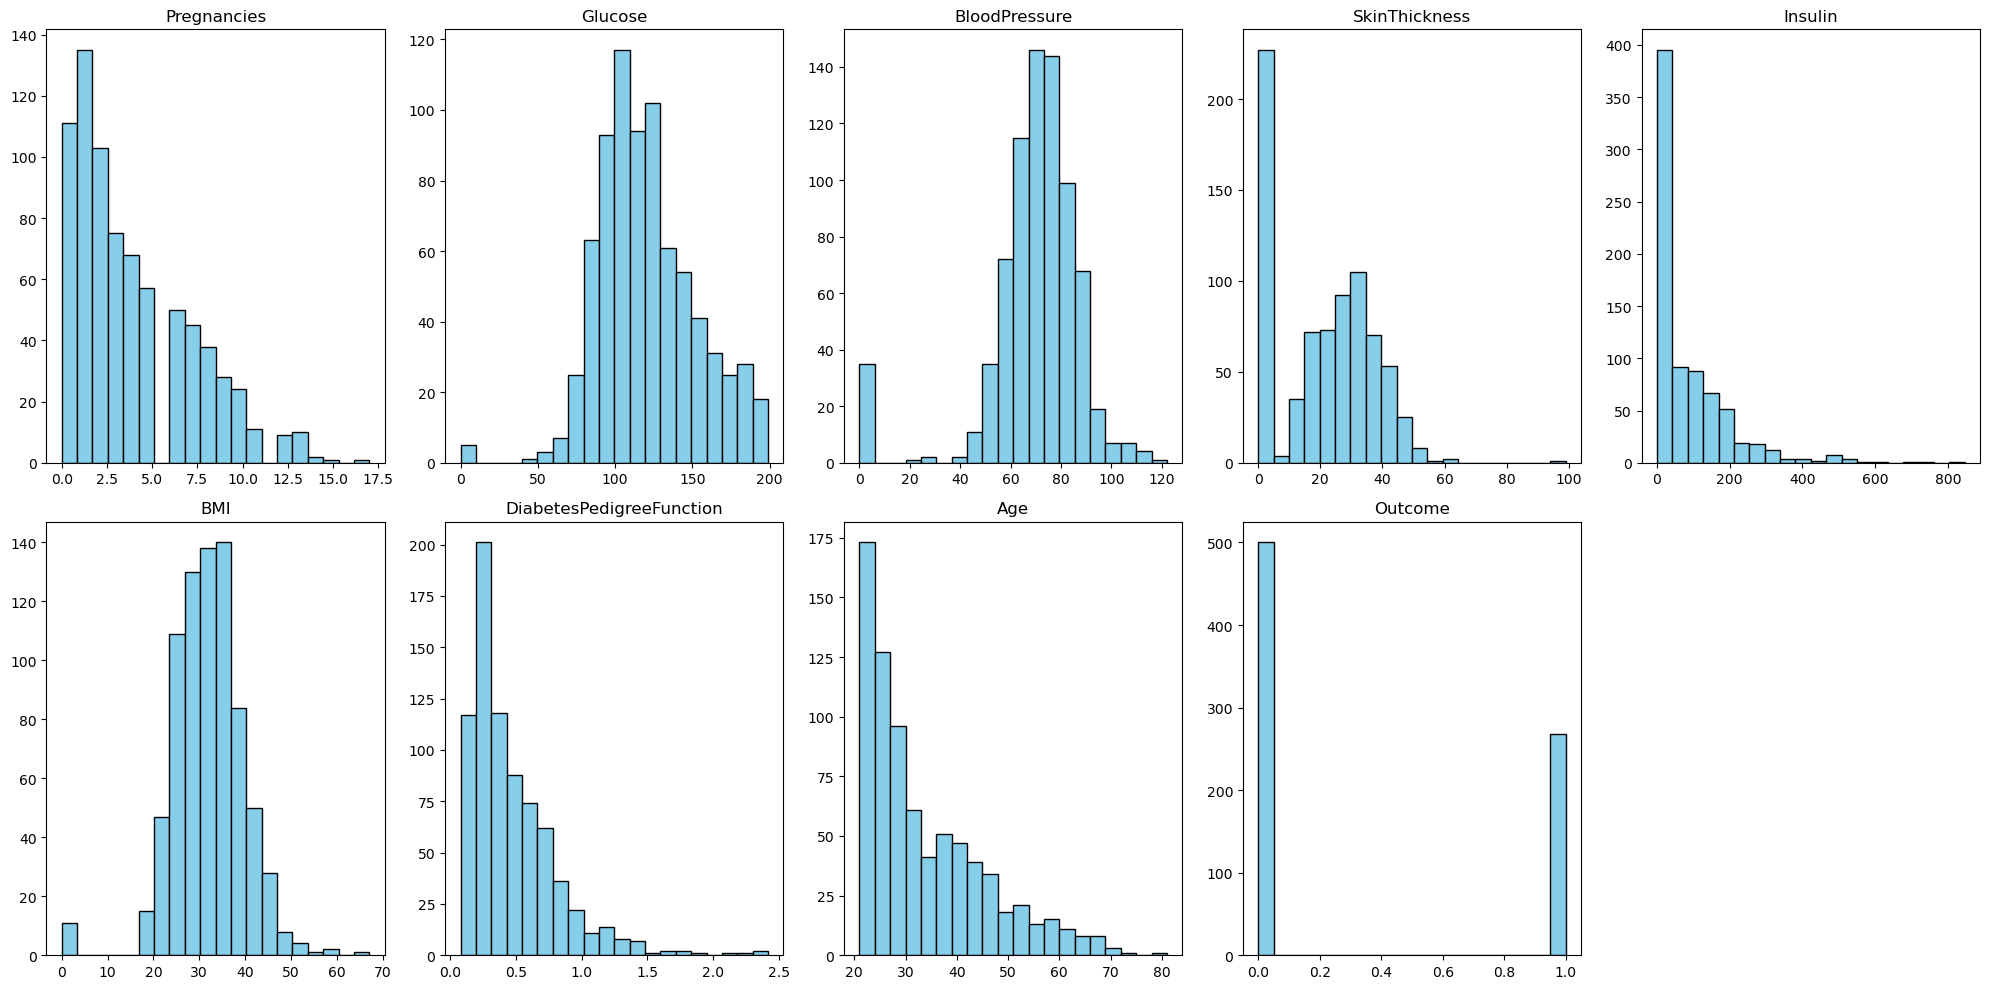

In [13]:
import matplotlib.pyplot as plt

# Visualizar histogramas en 5 columnas
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico

for i, col in enumerate(df.columns):
    plt.subplot((len(df.columns) + 4) // 5, 5, i + 1)  # Filas calculadas automáticamente
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Diego\AppData\Local\Temp\ipykernel_10404\2835317012.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Dieg

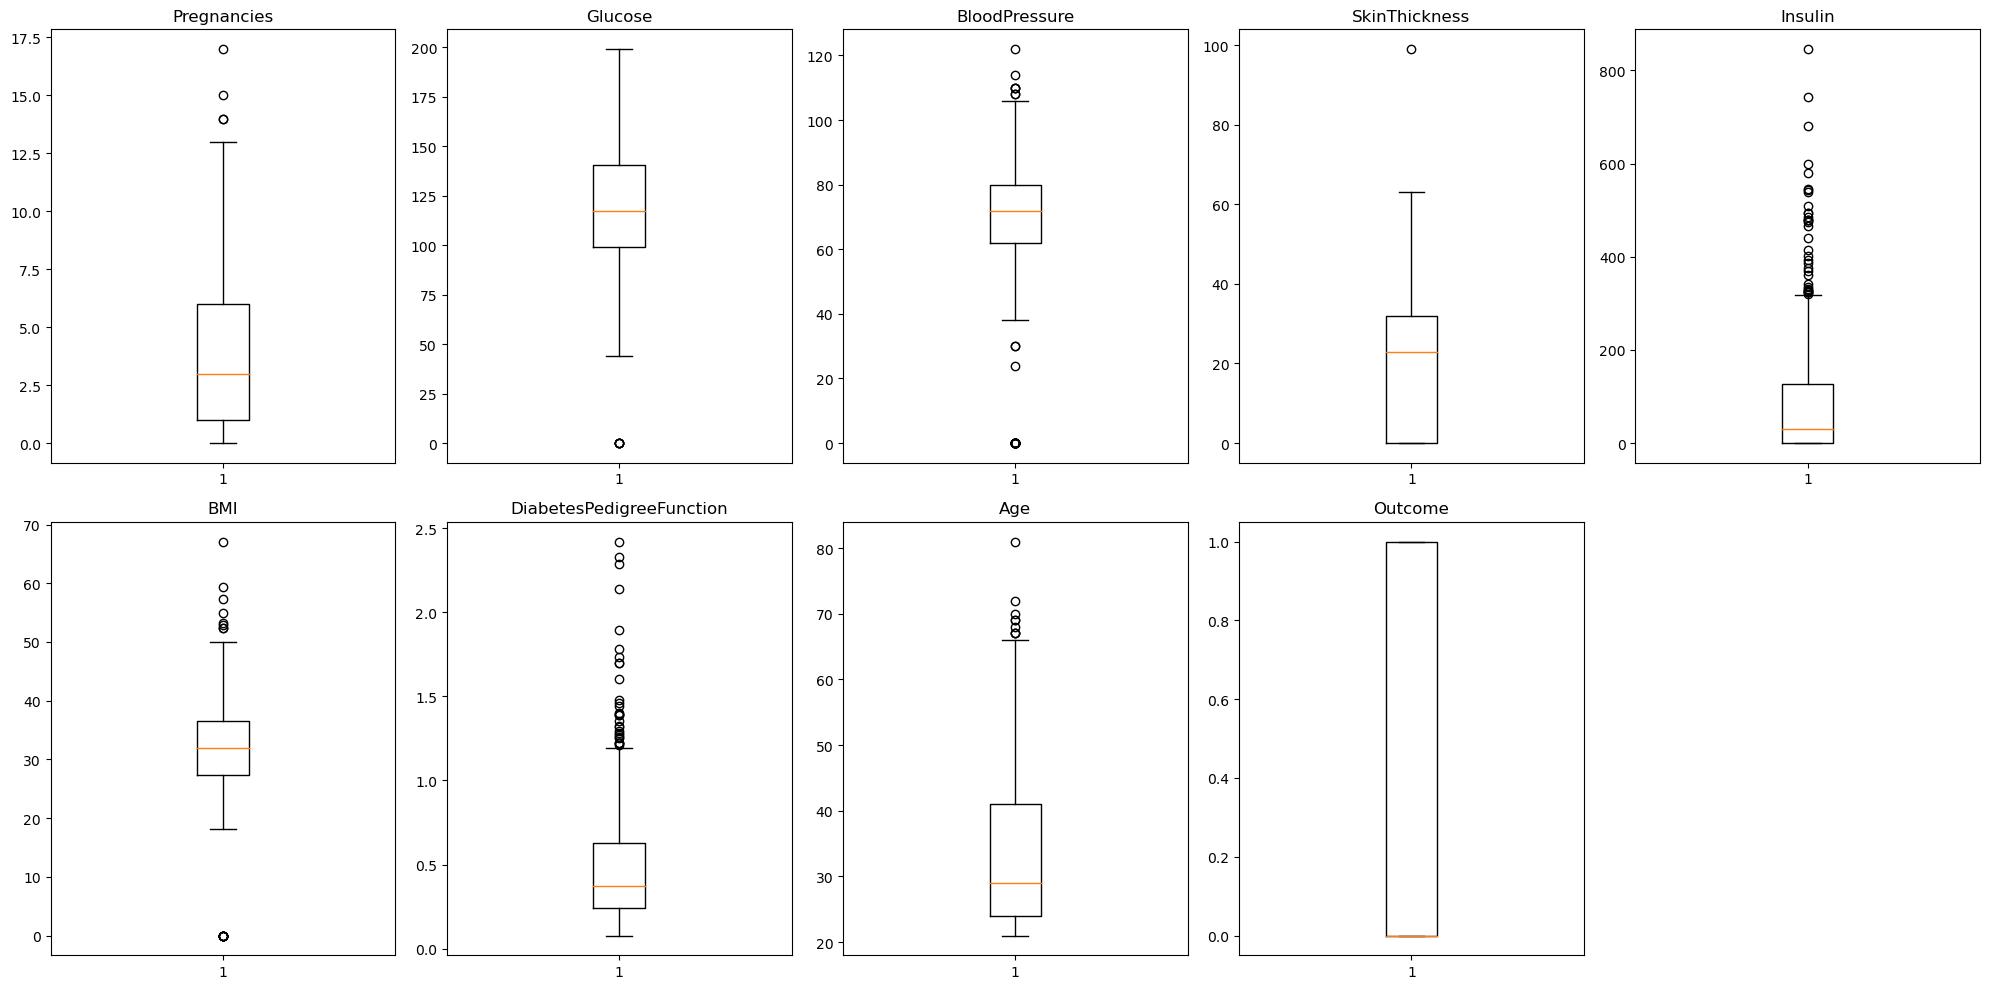

In [14]:
import matplotlib.pyplot as plt

# Visualizar boxplots en 5 columnas
plt.figure(figsize=(20, 10))  # Tamaño del gráfico

for i, col in enumerate(df.columns):
    plt.subplot((len(df.columns) + 4) // 5, 5, i + 1)  # 5 columnas
    plt.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


Al analizar los datos, ocho variables de entrada y una variable de salida (la última columna).

Las variables se pueden resumir de la siguiente manera:

**Variables de entrada (X):**
1. Número de veces embarazada.
2. Concentración de glucosa plasmática a las dos horas de una prueba de tolerancia oral a la glucosa.
3. Presión arterial diastólica (mm Hg).
4. Grosor del pliegue cutáneo del tríceps (mm).
5. Insulina sérica de dos horas (mu U/ml).
6. Índice de masa corporal (peso en kg/(altura en m)^2).
7. Función de pedigrí de diabetes.
8. Años de edad.

**Variables de salida (y):**
1. Variable de clase (0 o 1)

Una vez que el archivo CSV se carga en la memoria, podemos dividir las columnas de datos en variables de entrada y salida.

Los datos se almacenarán en una matriz de dos dimensiones, donde la primera dimensión son filas y la segunda son columnas, por ejemplo, [filas, columnas].


In [16]:
# Dividimos los datos en variables de entrada X y de salida Y
# axis 1 = columna; axis 2 = filas

X = df.drop('Outcome', axis=1)  # Variables independientes
y = df['Outcome']  # Variable dependiente

In [17]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [18]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [20]:
df['Outcome'].value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

Ahora estamos listos para definir nuestro modelo de red neuronal.

## Definir el modelo de Keras

Los modelos en Keras se definen como una secuencia de capas, como lo vimos anteriormente.

Creamos un modelo secuencial y agregamos capas (una a la vez), hasta que estemos satisfechos con nuestra arquitectura de red.

De lo primero que debemos asegurarnos es de que la capa de entrada tenga la cantidad correcta de entidades de entrada. Esto se puede especificar al crear la primera capa con el argumento ``input_shape`` y configurarlo para presentar las ocho variables de entrada como un vector.

**¿Cómo sabemos el número de capas y sus tipos?**

Esta es una pregunta difícil. Hay heurísticas que podemos usar, y a menudo la mejor estructura de red se encuentra mediante un proceso de experimentación de prueba y error. Generalmente, se necesita una red lo suficientemente grande para capturar la estructura del problema.

En este ejemplo, usaremos una estructura de red totalmente conectada, con tres capas.

Las capas totalmente conectadas se definen mediante la clase ``Dense``. Puede especificar el número de neuronas o nodos en la capa como primer argumento y la función de activación usando el argumento de activación.

Además, utilizaremos la función de activación de la unidad lineal rectificada denominada *relu* en las dos primeras capas, y la función sigmoid en la capa de salida.

Si se toma esto en cuenta, podemos definir nuestro modelo así:

- El modelo espera filas de datos con ocho variables (el argumento ``input_shape=(8,)``
- La primera capa oculta tiene 12 nodos y utiliza la función de activación relu.
- La segunda capa oculta tiene 8 nodos y utiliza la función de activación relu.
- La capa de salida tiene un nodo y utiliza la función de activación sigmoidea.

Ahora vamos a definirlo en Python.



In [21]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Compilación del modelo de Keras

Ahora que el modelo está definido, podemos compilarlo.

La compilación del modelo utiliza las bibliotecas numéricas eficientes ocultas (el llamado backend), como **Theano** o **TensorFlow**. El backend elige automáticamente la mejor manera de representar la red para entrenar y hacer predicciones, a fin de ejecutar en su hardware, como CPU, GPU o incluso distribuido.

Al compilar, debemos especificar algunas propiedades adicionales requeridas cuando se entrena la red. Recuerda, entrenar una red significa encontrar el mejor conjunto de pesos para asignar entradas a salidas, en su conjunto de datos.

Debemos especificar la función de pérdida que se usará para evaluar un conjunto de pesos, el optimizador que se usa para buscar entre diferentes pesos para la red y cualquier métrica opcional que se desee recopilar e informar durante el entrenamiento.

En este caso, utiliza la **entropía cruzada** como argumento de pérdida. Esta pérdida es para problemas de clasificación binaria, y se define en Keras como ``binary_crossentropy``.

Definiremos el optimizador como el algoritmo de descenso de gradiente estocástico eficiente “ adam ”. Esta es una versión popular del descenso de gradiente, porque se sintoniza automáticamente y brinda buenos resultados en una amplia gama de problemas.

Ahora vamos a compilar el modelo en Python.

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrenamiento del modelo de Keras

Podemos entrenar o ajustar su modelo en sus datos cargados llamando a la función ``fit()`` en el modelo.

El entrenamiento ocurre en épocas, y cada época se divide en lotes.

- **Época:** una pasada por todas las filas del conjunto de datos de entrenamiento.
- **Lote:** una o más muestras consideradas por el modelo, dentro de una época antes de que se actualicen los pesos.

Este problema se ejecutará durante un pequeño número de épocas (150) y utilizará un tamaño de lote relativamente pequeño: 10.

Estas configuraciones se pueden elegir de manera experimental, mediante ensayo y error.

Vamos a entrenar el modelo.



In [23]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 1000us/step - loss: 8.0292 - accuracy: 0.4896
Epoch 2/150
77/77 [==============================] - 0s 895us/step - loss: 2.0969 - accuracy: 0.5547
Epoch 3/150
77/77 [==============================] - 0s 921us/step - loss: 1.4449 - accuracy: 0.5898
Epoch 4/150
77/77 [==============================] - 0s 897us/step - loss: 1.1056 - accuracy: 0.5938
Epoch 5/150
77/77 [==============================] - 0s 908us/step - loss: 1.0052 - accuracy: 0.6107
Epoch 6/150
77/77 [==============================] - 0s 908us/step - loss: 0.9134 - accuracy: 0.6276
Epoch 7/150
77/77 [==============================] - 0s 921us/step - loss: 0.8489 - accuracy: 0.6224
Epoch 8/150
77/77 [==============================] - 0s 908us/step - loss: 0.8164 - accuracy: 0.6393
Epoch 9/150
77/77 [==============================] - 0s 882us/step - loss: 0.7908 - accuracy: 0.6589
Epoch 10/150
77/77 [==============================] - 0s 908us/step - loss: 0.7597 - accur

77/77 [==============================] - 0s 855us/step - loss: 0.5658 - accuracy: 0.7253
Epoch 82/150
77/77 [==============================] - 0s 882us/step - loss: 0.5516 - accuracy: 0.7253
Epoch 83/150
77/77 [==============================] - 0s 895us/step - loss: 0.5610 - accuracy: 0.7292
Epoch 84/150
77/77 [==============================] - 0s 868us/step - loss: 0.5506 - accuracy: 0.7253
Epoch 85/150
77/77 [==============================] - 0s 868us/step - loss: 0.5596 - accuracy: 0.7370
Epoch 86/150
77/77 [==============================] - 0s 908us/step - loss: 0.5810 - accuracy: 0.7279
Epoch 87/150
77/77 [==============================] - 0s 882us/step - loss: 0.6065 - accuracy: 0.7148
Epoch 88/150
77/77 [==============================] - 0s 907us/step - loss: 0.5645 - accuracy: 0.7357
Epoch 89/150
77/77 [==============================] - 0s 908us/step - loss: 0.5760 - accuracy: 0.7422
Epoch 90/150
77/77 [==============================] - 0s 895us/step - loss: 0.5554 - accuracy: 

## Evaluación del modelo

Hemos entrenado nuestra red neuronal en todo el conjunto de datos y podemos evaluar el rendimiento de la red en el mismo conjunto de datos.

Puedes evaluar tu modelo en tu dataset de entrenamiento usando la función ``evaluate()`` y pasando la misma entrada y salida que usaste para entrenar el modelo.

La función ``evaluate()`` devolverá una lista con dos valores. El primero será la pérdida del modelo en el conjunto de datos, y el segundo será la precisión del modelo en el conjunto de datos.

Vamos a hacerlo en Python.



In [24]:
_, accuracy = model.evaluate(X, y)
print('Presición: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 869us/step - loss: 0.5290 - accuracy: 0.7383
Presición: 73.83


Los resultados pueden variar, dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las  diferencias en la precisión numérica. Considera ejecutar el ejemplo varias veces y compara el resultado promedio.

# Predicciones con el modelo

Hacer predicciones es tan fácil como llamar a la función ``predict(``` en el modelo. Estás utilizando una función de activación sigmoidea en la capa de salida, por lo que las predicciones serán una probabilidad de entre 0 y 1. Puedes convertirlas fácilmente en una predicción binaria nítida para esta tarea de clasificación redondeándolas.



In [25]:
# Hacemos predicciones con nuestro modelo y datos del dataset
predictions = model.predict(X)
# Redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

24/24 [==============================] - 0s 652us/step


Podemos convertir la probabilidad en 0 o 1 para predecir clases nítidas directamente; por ejemplo:

In [26]:
predictions = (model.predict(X) > 0.5).astype(int)

24/24 [==============================] - 0s 696us/step


Ahora, con un for, vemos un conjunto de las predicciones:

In [29]:
for i in range(10):
    print('%s => %d (esperado %d)' % (X.iloc[i].tolist(), int(predictions[i] > 0.5), int(y.iloc[i])))


[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (esperado 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (esperado 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (esperado 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (esperado 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (esperado 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (esperado 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (esperado 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (esperado 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (esperado 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (esperado 1)


In [30]:
import pandas as pd

# Crear una lista de diccionarios con los primeros 10 valores
resultados = []

for i in range(10):
    fila = {
        'Input': X.iloc[i].tolist(),
        'Predicción': int(predictions[i] > 0.5),
        'Real': int(y.iloc[i])
    }
    resultados.append(fila)

# Convertir a DataFrame para mostrarlo como tabla
tabla_resultados = pd.DataFrame(resultados)

# Mostrar solo columnas relevantes
print(tabla_resultados[['Predicción', 'Real']])


   Predicción  Real
0           1     1
1           0     0
2           1     1
3           0     0
4           1     1
5           0     0
6           0     1
7           0     0
8           1     1
9           0     1


Puedes ver que de 10 predicciones acertó 7; entonces, la métrica de precisión antes mencionada, de aproximadamente 77 %, se cumple.

Cabe destacar que para usar un módelo así en un ambiente productivo hay que realizar lo siguiente:
- Preprocesamiento de datos.
- Entrenamiento con más epocas o vueltas y un tamaño mayor de batches.
- Entrenamiento y evaluación del modelo varias veces para determinar la congruencia de los resultados.

Una vez hechos estos pasos, estamos listos para seguir con nuestro aprendizaje de redes neuronales.

#### Ponte a prueba 2

Una empresa de fabricación de relojes inteligentes desea clasificar sus relojes en diferentes rangos de precios según sus características. La empresa ha recopilado datos de varios modelos de relojes inteligentes y desea utilizar estos datos para predecir el rango de precios de los nuevos modelos que producirán en el futuro.

**Variables**:
1. `battery_duration`: Duración de la batería en horas (continuo).
2. `screen_size`: Tamaño de la pantalla en pulgadas (continuo).
3. `memory`: Memoria interna en GB (continuo).
4. `has_GPS`: Si el reloj tiene GPS (0: No, 1: Sí).
5. `has_Bluetooth`: Si el reloj tiene Bluetooth (0: No, 1: Sí).
6. `water_resistant`: Si el reloj es resistente al agua (0: No, 1: Sí).
7. `price_range`: Rango de precios del reloj (0: Bajo, 1: Medio, 2: Alto, 3: Premium).

Puedes encontrar el conjunto de datos en el siguiente enlace: https://drive.google.com/file/d/1YL_J0SRqP58b_c3OcfdwYnzRNEr0wd4W/view?usp=sharing

Basado en este conjunto de datos, deberás:

1. Dividir los datos en conjuntos de entrenamiento y prueba.
2. Normalizar o estandarizar las características.
3. Construir un modelo de red neuronal usando Keras (o cualquier otro marco que prefieras).
4. Entrenar el modelo con el conjunto de datos de entrenamiento.
5. Evaluar el modelo con el conjunto de datos de prueba.
6. Hacer predicciones con el modelo y analizar los resultados.


# Reto semanal
Concluiste la Semana 17, y con ellos has iniciado el Módulo 5. Ahora es momento que te pongas a prueba con el reto de la semana.

Usa el siguiente dataset de precios de dispositivos móviles: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

Seguramente te parecerá familiar porque ya lo hemos usado antes.

Haz lo siguiente:
- Genera un modelo de entrenamiento con Keras.
- Experimenta con la cantidad de nodos y capas.
- Experimenta con diferentes optimizadores al compilar el modelo.
- Entrena el modelo y obtén la precisión.
- Genera 20 predicciones y analiza los resultados.

Anota tus dudas y compártelas en clase con tu coach. ¡Sigue esforzándote mucho!